In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# CSV File Upload

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# all_data_csv = glob.glob("data/*.csv")
from google.colab import files
# Choosing Kaggle key file from local computer
# To get a kaggle key, you have to log into your kaggle account and go to your account settings
# Scroll down to the API section and create a new token
# You should be able to download a file named 'kaggle' and this is the one you upload
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"emilguzman","key":"c18df66dc739ffe362255a0762353e69"}'}

In [19]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [20]:
!kaggle datasets download -d mexwell/nba-shots

Dataset URL: https://www.kaggle.com/datasets/mexwell/nba-shots
License(s): other
nba-shots.zip: Skipping, found more recently modified local copy (use --force to force download)


In [21]:
!unzip \*.zip && rm *.zip

Archive:  nba-shots.zip
  inflating: NBA_2004_Shots.csv      
  inflating: NBA_2005_Shots.csv      
  inflating: NBA_2006_Shots.csv      
  inflating: NBA_2007_Shots.csv      
  inflating: NBA_2008_Shots.csv      
  inflating: NBA_2009_Shots.csv      
  inflating: NBA_2010_Shots.csv      
  inflating: NBA_2011_Shots.csv      
  inflating: NBA_2012_Shots.csv      
  inflating: NBA_2013_Shots.csv      
  inflating: NBA_2014_Shots.csv      
  inflating: NBA_2015_Shots.csv      
  inflating: NBA_2016_Shots.csv      
  inflating: NBA_2017_Shots.csv      
  inflating: NBA_2018_Shots.csv      
  inflating: NBA_2019_Shots.csv      
  inflating: NBA_2020_Shots.csv      
  inflating: NBA_2021_Shots.csv      
  inflating: NBA_2022_Shots.csv      
  inflating: NBA_2023_Shots.csv      
  inflating: NBA_2024_Shots.csv      


In [22]:
# Consolidating all csv files
import os
file_names = os.listdir()
all_data_csv = [file for file in file_names if file.endswith('.csv')]

In [23]:
dfs_combine = []

# for each file, add to dfs_combine
for file in all_data_csv:
    df = pd.read_csv(file)
    dfs_combine.append(df)

# join dfs together
df_all_data = pd.concat(dfs_combine, ignore_index=True)

# save combined dfs into new file
df_all_data.to_csv('all_years.csv', index=False)

In [24]:
# removes the individual year csv files from directory
for file in all_data_csv:
  os.remove(file)


# Exploration

In [6]:
data = pd.read_csv('all_years.csv')

In [26]:
print('Data Columns: ')
print(data.columns)
print('Data Shape: ')
print(data.shape)

Data Columns: 
Index(['SEASON_1', 'SEASON_2', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID',
       'PLAYER_NAME', 'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID',
       'HOME_TEAM', 'AWAY_TEAM', 'EVENT_TYPE', 'SHOT_MADE', 'ACTION_TYPE',
       'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE',
       'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT'],
      dtype='object')
Data Shape: 
(4231262, 26)


In [27]:
data.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2011,2010-11,1610612759,San Antonio Spurs,2588,Matt Bonner,F,PF,04-13-2011,21001229,...,Mid-Range,Right Side,R,8-16 ft.,-12.5,7.45,12,4,0,0
1,2011,2010-11,1610612759,San Antonio Spurs,202390,Gary Neal,G,SG,04-13-2011,21001229,...,Right Corner 3,Right Side,R,24+ ft.,-23.0,5.95,23,4,0,0
2,2011,2010-11,1610612746,Los Angeles Clippers,201933,Blake Griffin,F,PF,04-13-2011,21001228,...,Restricted Area,Center,C,Less Than 8 ft.,0.8,6.45,1,4,0,0
3,2011,2010-11,1610612746,Los Angeles Clippers,201933,Blake Griffin,F,PF,04-13-2011,21001228,...,Restricted Area,Center,C,Less Than 8 ft.,1.1,7.25,2,4,0,0
4,2011,2010-11,1610612763,Memphis Grizzlies,201564,O.J. Mayo,G,SG,04-13-2011,21001228,...,Above the Break 3,Center,C,24+ ft.,-1.7,32.15,26,4,0,7


In [28]:
for attribute in data.columns:
    print('-----' + attribute + '-----')
    print(data[attribute].unique())
    print('\n')

-----SEASON_1-----
[2011 2004 2009 2019 2018 2017 2008 2021 2024 2014 2006 2022 2020 2016
 2015 2007 2013 2012 2010 2005 2023]


-----SEASON_2-----
['2010-11' '2003-04' '2008-09' '2018-19' '2017-18' '2016-17' '2007-08'
 '2020-21' '2023-24' '2013-14' '2005-06' '2021-22' '2019-20' '2015-16'
 '2014-15' '2006-07' '2012-13' '2011-12' '2009-10' '2004-05' '2022-23']


-----TEAM_ID-----
[1610612759 1610612746 1610612763 1610612758 1610612756 1610612747
 1610612751 1610612754 1610612753 1610612764 1610612739 1610612745
 1610612760 1610612750 1610612749 1610612740 1610612742 1610612757
 1610612741 1610612744 1610612748 1610612761 1610612755 1610612752
 1610612743 1610612738 1610612762 1610612765 1610612766 1610612737]


-----TEAM_NAME-----
['San Antonio Spurs' 'Los Angeles Clippers' 'Memphis Grizzlies'
 'Sacramento Kings' 'Phoenix Suns' 'Los Angeles Lakers' 'New Jersey Nets'
 'Indiana Pacers' 'Orlando Magic' 'Washington Wizards'
 'Cleveland Cavaliers' 'Houston Rockets' 'Oklahoma City Thunder'
 '

In [29]:
# ['SEASON_1', 'SEASON_2', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID',
#  'PLAYER_NAME', 'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID',
#  'HOME_TEAM', 'AWAY_TEAM', 'EVENT_TYPE', 'SHOT_MADE', 'ACTION_TYPE',
#  'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE',
#  'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT']

# data already clean -> separate into attribute categories

pred_attrib = ['EVENT_TYPE', 'SHOT_MADE']
numerical_attrib = ['SEASON_1', 'TEAM_ID', 'PLAYER_ID', 'GAME_ID', 'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT']
categorical_attrib = list(set(data.columns) - set(pred_attrib) - set(numerical_attrib))

<Axes: >

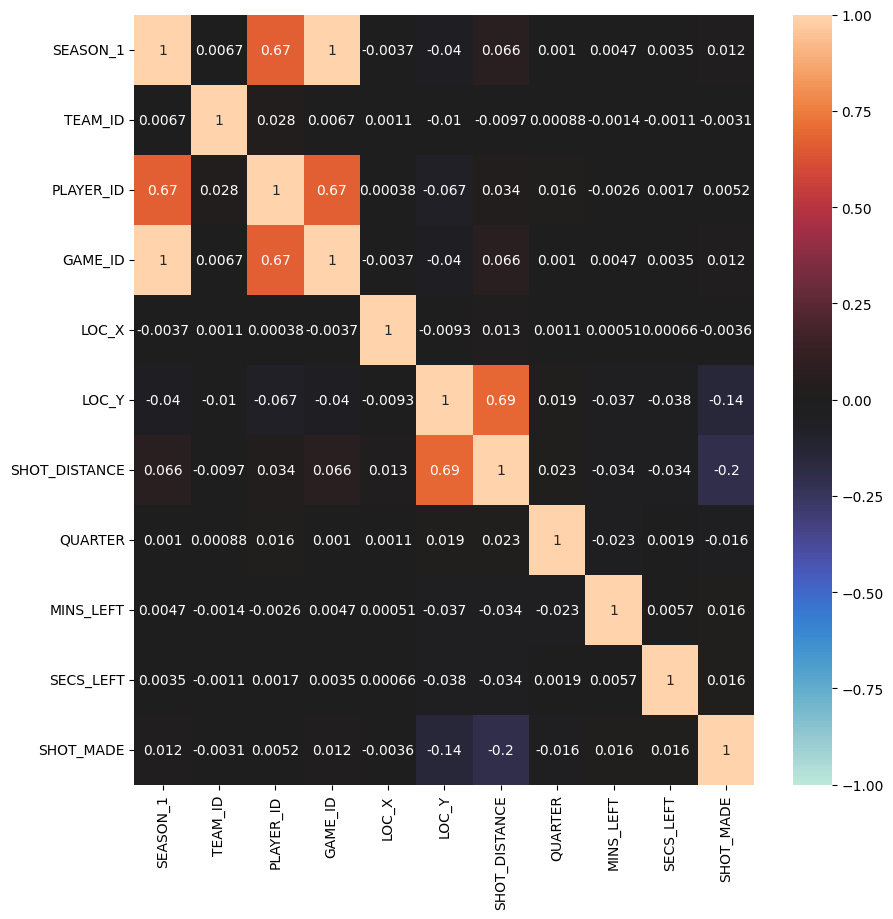

In [30]:
# heatmap w/ numerical attributes

# make figure larger
fig, ax = plt.subplots(figsize=(10,10))

heat_vars = numerical_attrib.copy()
heat_vars.append('SHOT_MADE')
sns.heatmap(data[heat_vars].corr(), annot=True,vmin=-1, vmax=1, center= 0, ax=ax)

In [31]:
# pairplot with sample of data
sample = data.sample(int(len(data) * 0.0005))
sns.pairplot(sample, hue='SEASON_1', diag_kind='auto')

Output hidden; open in https://colab.research.google.com to view.

# Pre-Processing

In [7]:
print(data.columns)

Index(['SEASON_1', 'SEASON_2', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID',
       'PLAYER_NAME', 'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID',
       'HOME_TEAM', 'AWAY_TEAM', 'EVENT_TYPE', 'SHOT_MADE', 'ACTION_TYPE',
       'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE',
       'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT'],
      dtype='object')


In [8]:
# Dropping redundant attributes
Preprocessed_Data = data.drop('SEASON_2', axis=1)
Preprocessed_Data = Preprocessed_Data.drop('TEAM_NAME', axis=1)
Preprocessed_Data = Preprocessed_Data.drop('PLAYER_NAME', axis=1)
Preprocessed_Data = Preprocessed_Data.drop('POSITION', axis=1)
Preprocessed_Data = Preprocessed_Data.drop('GAME_DATE', axis=1)
Preprocessed_Data = Preprocessed_Data.drop('EVENT_TYPE', axis=1)
Preprocessed_Data = Preprocessed_Data.drop('ZONE_NAME', axis=1)

In [9]:
# Encoding Categorical data

attributes_to_encode = ['POSITION_GROUP', 'HOME_TEAM', 'AWAY_TEAM', 'ACTION_TYPE', 'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_ABB', 'ZONE_RANGE']

for attribute in attributes_to_encode:
  encoding = 0
  observations = Preprocessed_Data[attribute].unique()
  for observation in observations:
    if pd.isna(observation): # Checks for NAN
      Preprocessed_Data.loc[Preprocessed_Data[attribute].isna(), attribute] = -1
    else:
      Preprocessed_Data.loc[Preprocessed_Data[attribute] == observation, attribute] = encoding
      encoding += 1

In [10]:
# Further Exploration

Preprocessed_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231262 entries, 0 to 4231261
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   SEASON_1        int64  
 1   TEAM_ID         int64  
 2   PLAYER_ID       int64  
 3   POSITION_GROUP  object 
 4   GAME_ID         int64  
 5   HOME_TEAM       object 
 6   AWAY_TEAM       object 
 7   SHOT_MADE       bool   
 8   ACTION_TYPE     object 
 9   SHOT_TYPE       object 
 10  BASIC_ZONE      object 
 11  ZONE_ABB        object 
 12  ZONE_RANGE      object 
 13  LOC_X           float64
 14  LOC_Y           float64
 15  SHOT_DISTANCE   int64  
 16  QUARTER         int64  
 17  MINS_LEFT       int64  
 18  SECS_LEFT       int64  
dtypes: bool(1), float64(2), int64(8), object(8)
memory usage: 585.1+ MB


<Axes: >

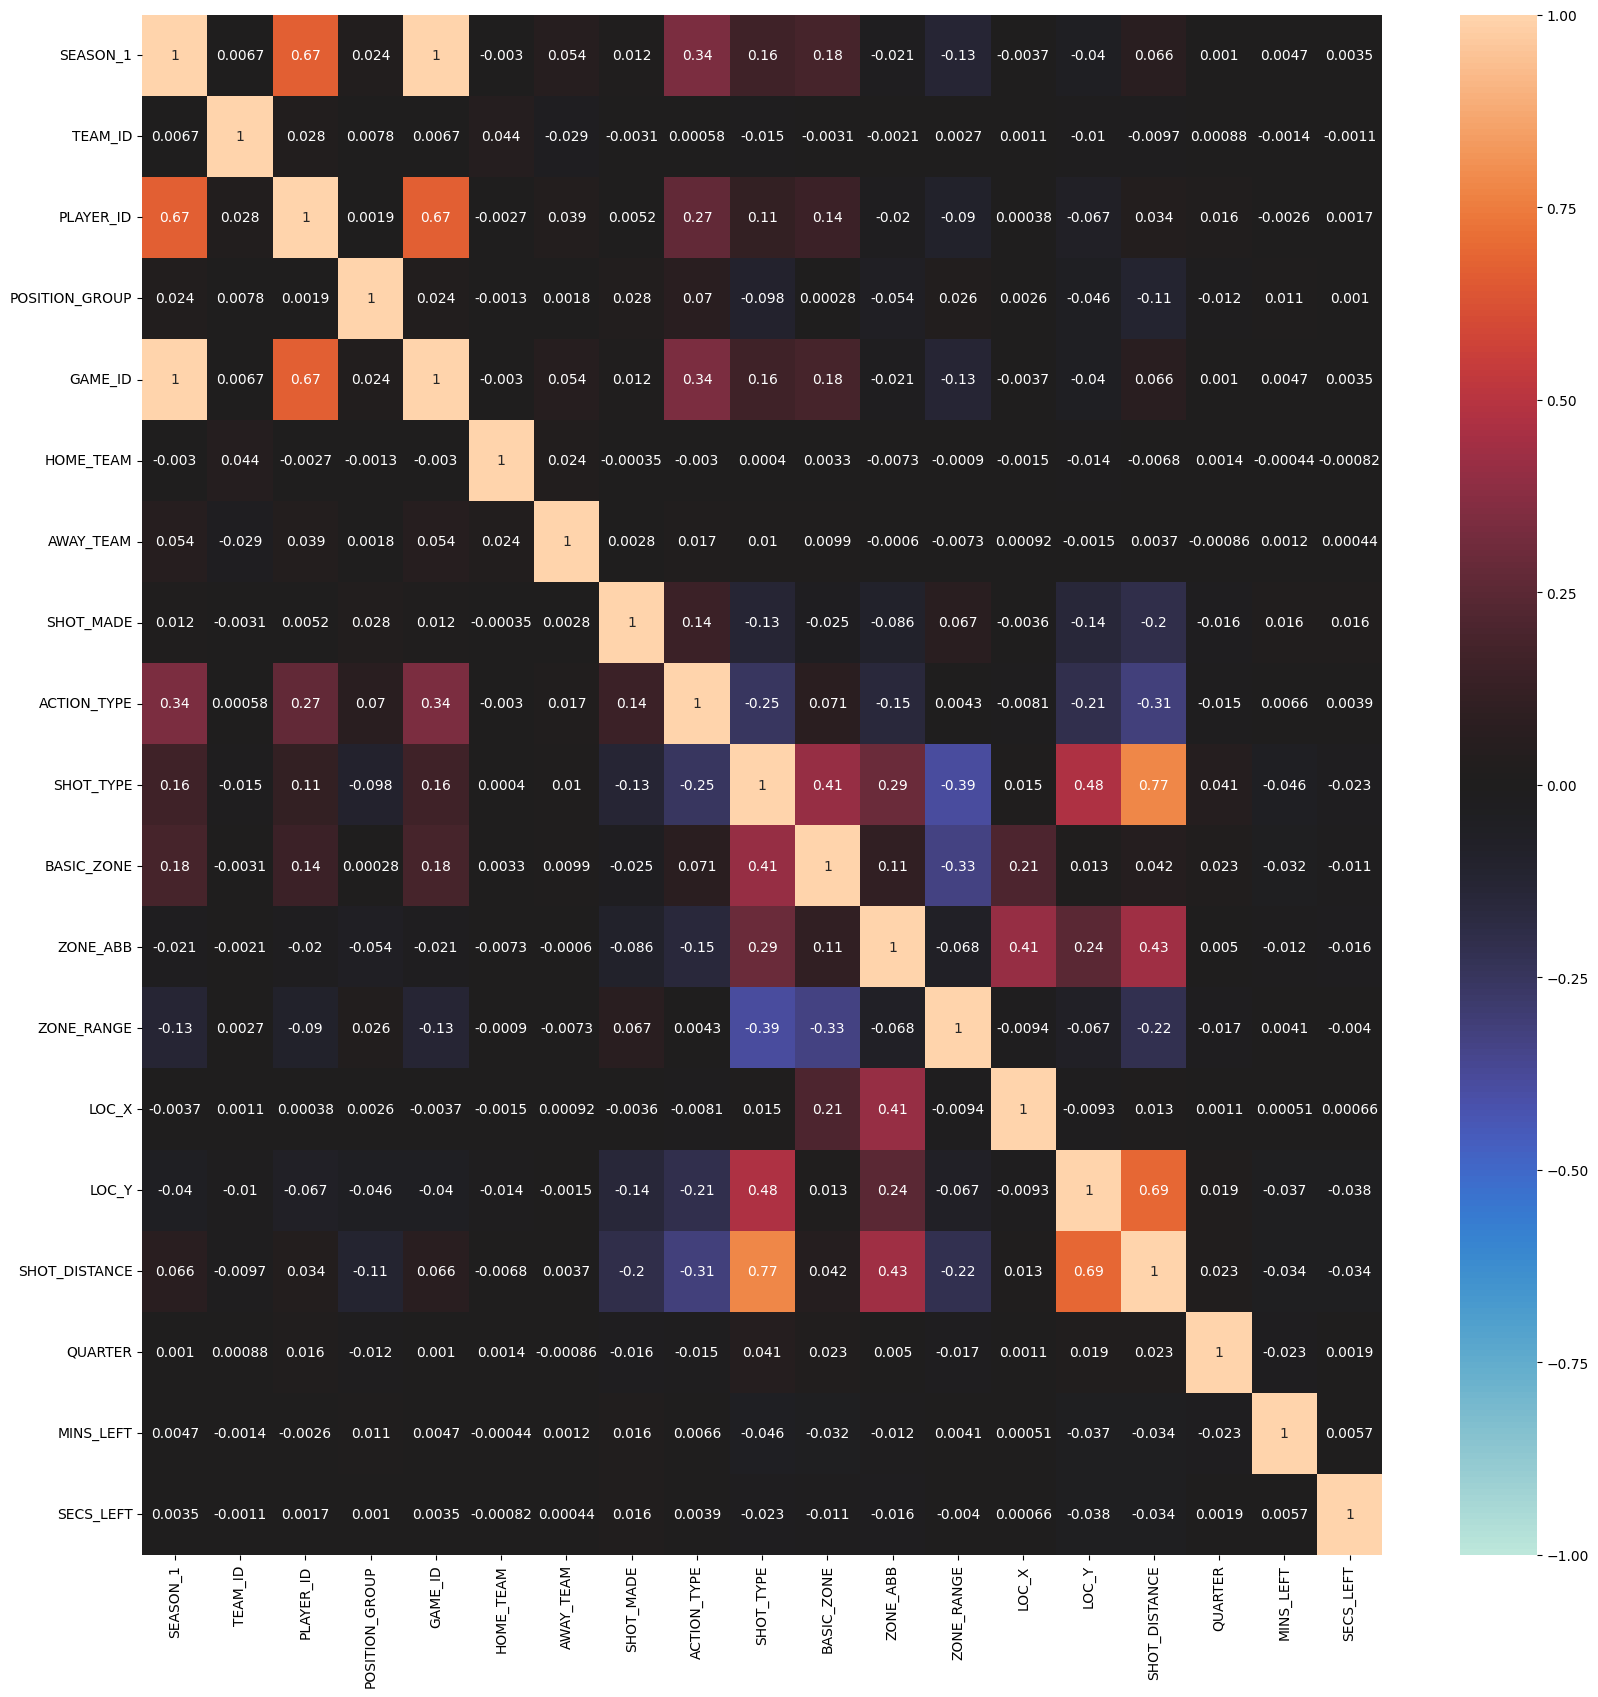

In [11]:
# heatmap w/ preprocessed attributes

# make figure larger
fig, ax = plt.subplots(figsize=(20,20))

attributes = list(Preprocessed_Data.columns)
heat_vars = attributes.copy()
sns.heatmap(Preprocessed_Data[heat_vars].corr(), annot=True,vmin=-1, vmax=1, center= 0, ax=ax)

In [12]:
# Zone Range and shot type are highly correlated, dropping shot dist
Preprocessed_Data = Preprocessed_Data.drop(columns='SHOT_DISTANCE', axis=1)

# Also dropping Season_1 and Game_ID
Preprocessed_Data = Preprocessed_Data.drop(columns='GAME_ID', axis=1)
Preprocessed_Data = Preprocessed_Data.drop(columns='SEASON_1', axis=1)

<Axes: >

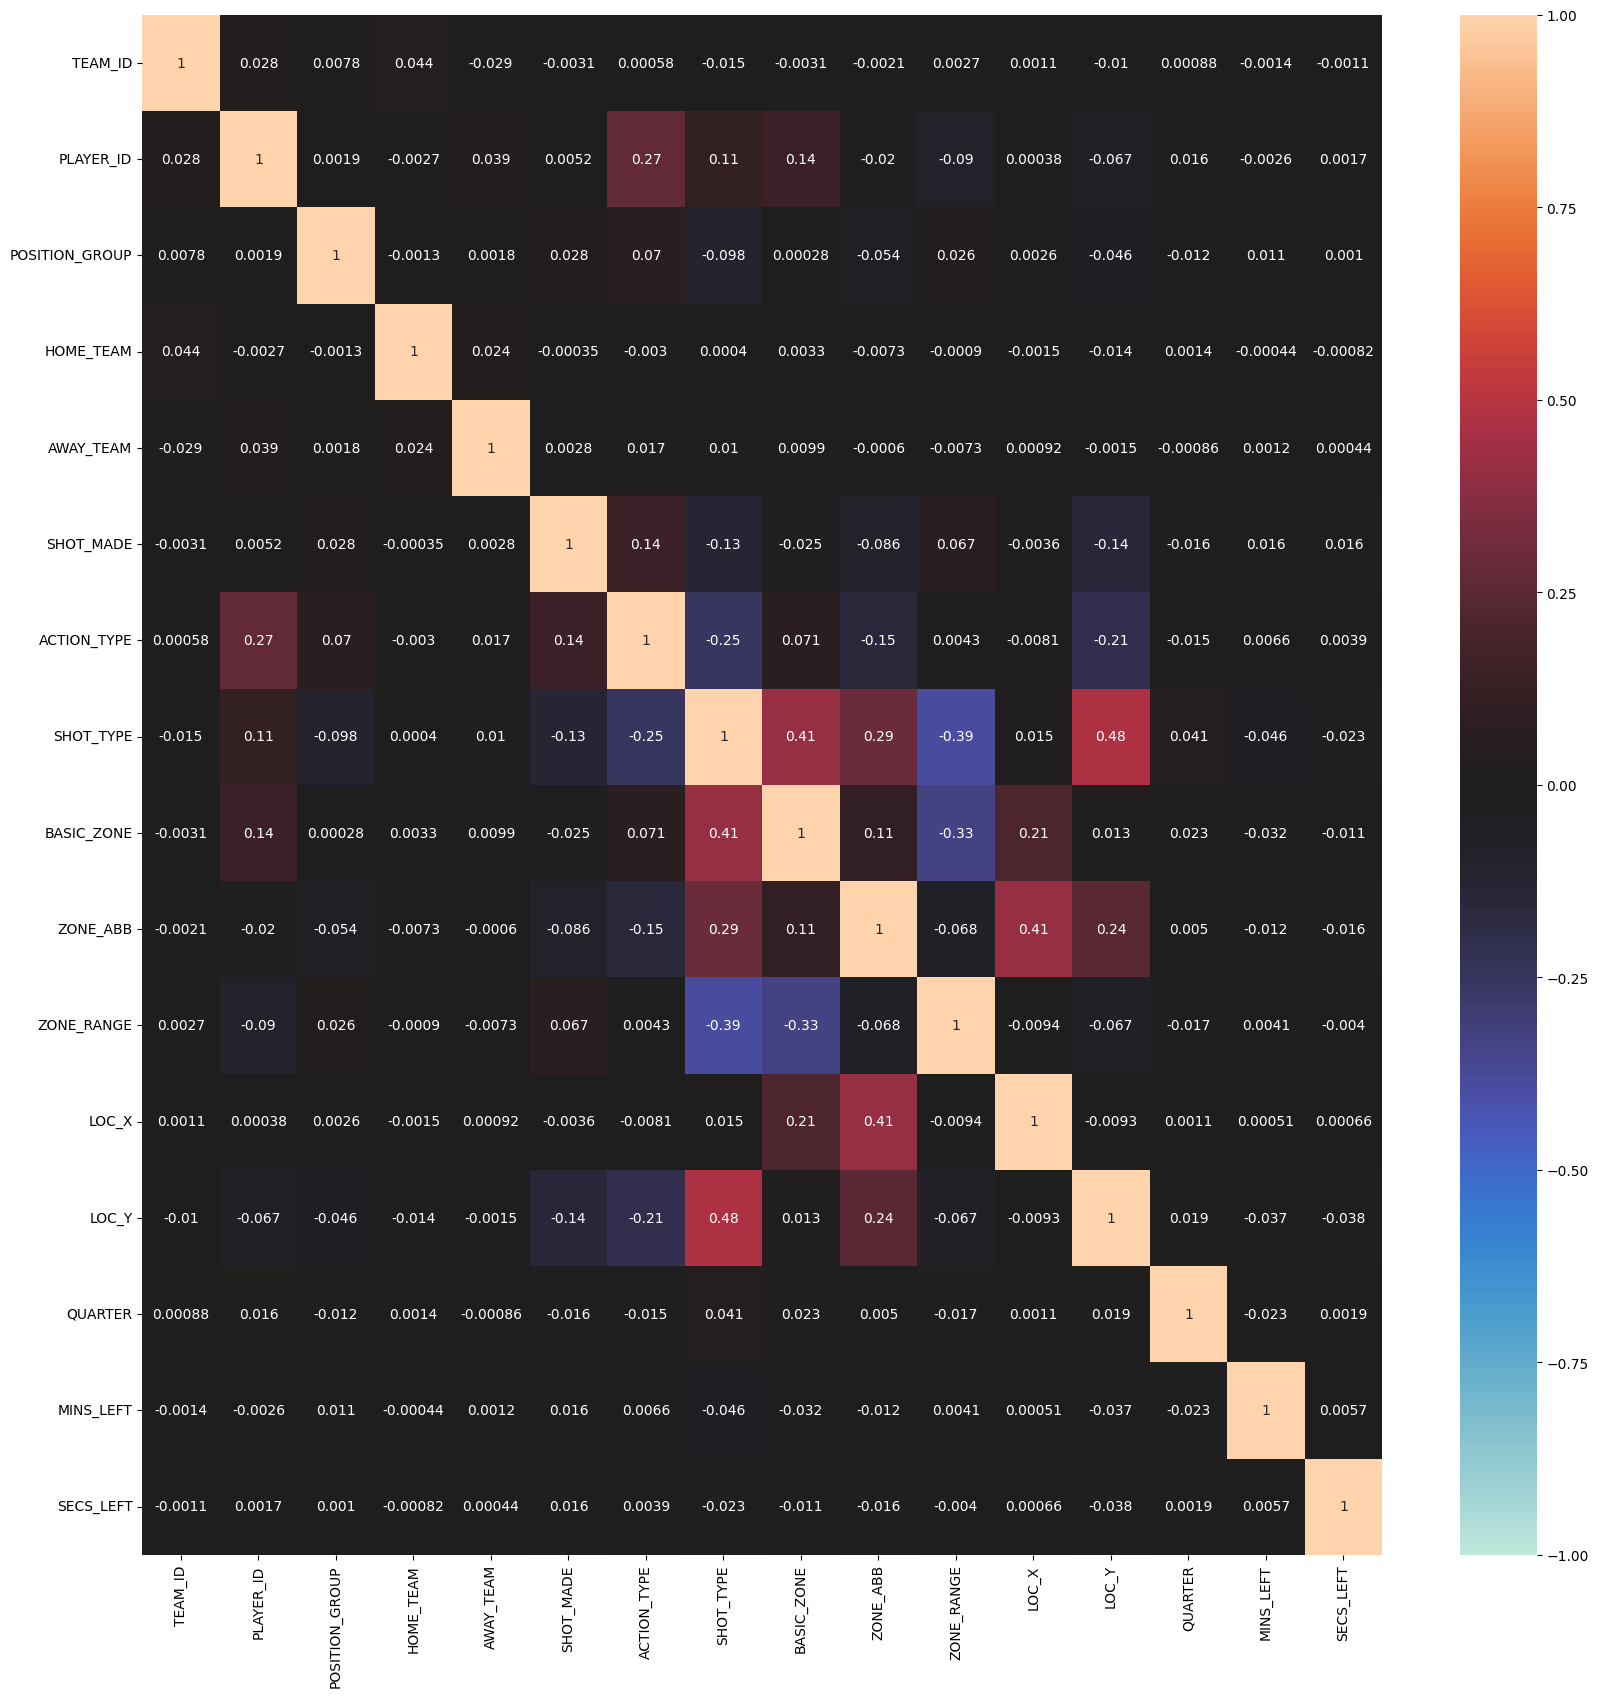

In [13]:
# Second heatmap to check for other highly correlated values

fig, ax = plt.subplots(figsize=(20,20))

attributes = list(Preprocessed_Data.columns)
heat_vars = attributes.copy()
sns.heatmap(Preprocessed_Data[heat_vars].corr(), annot=True,vmin=-1, vmax=1, center= 0, ax=ax)

# First Model

In [2]:
# Splitting data (20/80 split)
y = Preprocessed_Data.SHOT_MADE
x = Preprocessed_Data.drop('SHOT_MADE', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

# Checking if our data has the right dimensions
print('xTrain shape:', x_train.shape)
print('yTrain shape:', y_train.shape)
print('xTest shape:', x_train.shape)
print('yTest shape:', y_test.shape)

NameError: name 'Preprocessed_Data' is not defined

In [1]:
# Scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Seperating numerical data
x_numerical_columns = ['TEAM_ID', 'PLAYER_ID', 'LOC_X', 'LOC_Y', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT']
x_train_numerical = x_train[x_numerical_columns]
x_test_numerical = x_test[x_numerical_columns]

# Scaling numerical data
scaler = StandardScaler()
x_train_numerical = scaler.fit_transform(x_train_numerical)
x_test_numerical = scaler.transform(x_test_numerical)

# Encoding categorical data
# make sparse_output=False to ensure a numpy array for an ouput, will be useful for concatenating data
one_hot_encoder = OneHotEncoder(sparse_output=False)
x_categorical_columns = ['POSITION_GROUP', 'HOME_TEAM', 'AWAY_TEAM', 'ACTION_TYPE', 'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_ABB', 'ZONE_RANGE']
x_test_categorical = one_hot_encoder.fit_transform(x_test[x_categorical_columns])
x_train_categorical = one_hot_encoder.fit_transform(x_train[x_categorical_columns])

NameError: name 'x_train' is not defined

In [16]:
print('x Test (Numerical): ', x_test_numerical.shape)
print('x Train (Numerical): ', x_train_numerical.shape)
print('x Test (Categorical): ', x_test_categorical.shape)
print('x Train (Categorical): ', x_train_categorical.shape)

x Test (Numerical):  (846253, 7)
x Train (Numerical):  (3385009, 7)
x Test (Categorical):  (846253, 162)
x Train (Categorical):  (3385009, 162)


In [ ]:
# Updating x_train and x_test arrays
x_train = np.concatenate((x_train_numerical, x_train_categorical), axis=1)
x_test = np.concatenate((x_test_numerical, x_test_categorical), axis=1)

# Checking if our data has the right dimensions
print('xTrain shape:', x_train.shape)
print('yTrain shape:', y_train.shape)
print('xTest shape:', x_test.shape)
print('yTest shape:', y_test.shape)

In [ ]:
# Training first model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logisticModel = LogisticRegression(max_iter=1000)
logisticModel = logisticModel.fit(x_train, y_train)

# Evaluating Model
y_train_pred = logisticModel.predict(x_train)
y_test_pred = logisticModel.predict(x_test)

# Printing Reports

print(classification_report(y_test, y_test_pred))

In [ ]:
# TODO
# Fill in NAN values (making this a seperate ) [DONE]
# Second data exploration round, i.e. heat map [DONE]
# Get rid of attributes that correlate too much [DONE]
# Scale numerical attributes [DONE]
# One-hot-encode unordered(all of them) categorical values [DONE]
# Run first model (logistic regression) [DONE]
# Evaluate model, compare training vs test error [DONE]
# Answer 4-6 in write up

# Printing

In [3]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,110 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,482 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-sec

In [4]:
!pip install nbconvert
!apt-get install pandoc
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc-data
Suggested packages:
  texlive-latex-recommended texlive-xetex texlive-luatex pandoc-citeproc texlive-latex-extra
  context wkhtmltopdf librsvg2-bin groff ghc nodejs php python ruby libjs-mathjax libjs-katex
  citation-style-language-styles
The following NEW packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc pandoc-data
0 upgraded, 4 newly installed, 0 to remove and 55 not upgraded.
Need to get 20.6 MB of archives.
After this operation, 156 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [115 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm-extensions0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [25.1 kB]


In [5]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/CSE-151A-Project/CSE_151A_Project.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/CSE-151A-Project/CSE_151A_Project.ipynb to pdf
[NbConvertApp] Support files will be in CSE_151A_Project_files/
[NbConvertApp] Making directory ./CSE_151A_Project_files
[NbConvertApp] Writing 109529 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 607264 bytes to /content/drive/MyDrive/CSE-151A-Project/CSE_151A_Project.pdf
